# Image classification

In this notebook you will apply transfer learning to classify flowers into one the the categories.
You will use a pre trained model from tensorflow hub to extend it for your purpose.


In [ ]:
%reload_ext autoreload
%autoreload 2

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
mpl.rcParams['figure.figsize'] = (14, 4)
mpl.rcParams['axes.grid'] = True

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

print(f"Tensorflow Version {tf.__version__}, Keras Vesion: {keras.__version__}")

# Example of VGG16 pre-trained model

[ImageNet](https://image-net.org/) is an image database consisting of hundreds and thousands of images. Each image is annotated and has been a soure for many vision and deep learning research. The data is available for free to researchers for non-commercial use.

There are 1,000 different categories. For the last few years CNN models are successful and exceeded human performance.

[Please visit the URL above and review the wesite]

(VGG16)[https://www.robots.ox.ac.uk/~vgg/research/very_deep/] is a publicly available popular model. One can download it use or reuse it for other purpose.

Keras library provides API to download and use The VGG model.
your task is to download and use  pre-trained weights to use it as a starting point in your own model.

We can choose 16-layer or 19-layer version via the VGG16 and VGG19 classes.



In [ ]:
from keras.applications.vgg16 import VGG16
try:
    from keras.preprocessing.image import load_img
except:
    from keras.utils import load_img


from keras.utils import img_to_array
from keras.utils.vis_utils import plot_model

model = VGG16()
model.summary()
plot_model(model, to_file='vgg.png', show_layer_activations=1, show_shapes=1, show_layer_names=1)


### Visualize the model

<img src=vgg16.jpg>

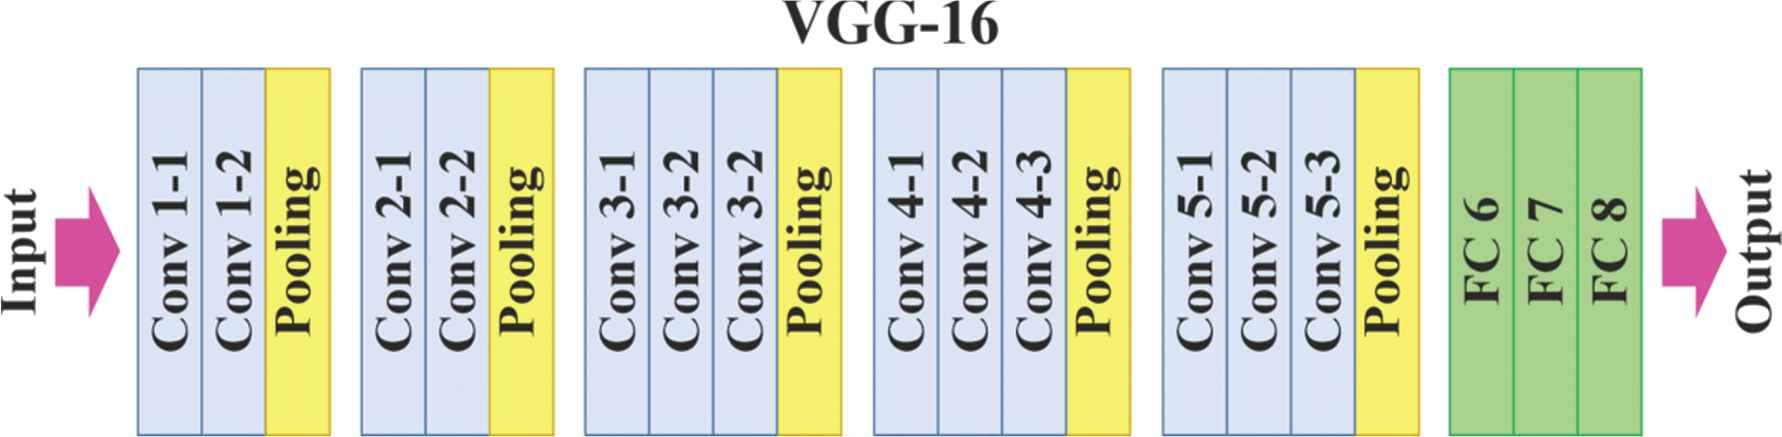

In [ ]:
image1 = load_img('mug.jpg', target_size=(224, 224))
plt.imshow(image1);

#image1 = load_img('mug.jpg')
#image1 = tf.image.resize( image1, ( 224, 224))
#plt.imshow(image1/255);

plt.grid(0)

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

image = img_to_array( image1)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

yhat = model.predict(image, verbose=0)
label = decode_predictions(yhat)

label = label[0][0]
print('Classification: %s (%.2f%%)' % (label[1], label[2]*100))

## Lets try on flower dataset

### Load Flower Data set

Explore it here: https://www.tensorflow.org/datasets/catalog/tf_flowers

In [ ]:
import tensorflow_datasets as tfds
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(  "tf_flowers",
                        split=["train[:70%]", "train[:30%]"], ## Train test split
                        batch_size=-1,
                        as_supervised=True) 

plt.imshow(train_ds[0])

## Explore the dataset
print( f'''
train dataset shape:    {train_ds.shape}, 
each dataset shape:     {train_ds[0].shape}, 
train labels shape:     {train_labels.shape}
First 10 train labels:  {train_labels[0:10]}

test dataset shape:    {test_ds.shape}, 
test labels shape:     {test_labels.shape}
First 10 test labels:  {test_labels[0:10]}
''' )

In [ ]:
def vgg_predict(image, show=True, msg="", log=True):
    image = tf.image.resize(image, (224, 224))
    image1 = img_to_array( image).copy()
    image1 = image1.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image1 = preprocess_input(image1)

    yhat = model.predict(image1, verbose=0)
    label = decode_predictions(yhat)

    label = label[0][0]
    if show:
        plt.imshow(image/255)
    if log:
        print(f'{msg}: predicted: {label[1]} {label[2]*100}')

    return label

#Without trimming
lab = vgg_predict(train_ds[0], msg="Expecting: roses")

# First method - we cro and resize to check
i1 = tf.image.crop_to_bounding_box(train_ds[0], 0, 0, 400, 400)
lab = vgg_predict(i1, msg="Expecting: roses")

print('''\n***=> Not getting the expected result.''')

In [ ]:
preds = []
for i in range (train_ds.shape[0]):
    l = vgg_predict(train_ds[i], show=False, msg=f"Expecting: roses", log=0)
    preds.append(l)


# Conclusion on first part

As you can see th direct downloaded model is not doing great on flower dataset

In [ ]:
model.compile()

IMG_SIZE = 224
test_ds1   = test_ds
test_ds1  = tf.image.resize(test_ds1, (IMG_SIZE, IMG_SIZE))
test_ds2  = preprocess_input(test_ds1) 
test_labels1  = to_categorical(test_labels, num_classes=5)

result = model.evaluate(test_ds2, test_labels1)
result